In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Configuration of Matplotlib grahps to use LaTeX formatting with siunitx library
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
from matplotlib import rc
rc('font',**{'family':'serif','serif':['DejaVu Sans']})
rc('text', usetex=True)
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markersize'] = 5
mpl.rcParams['text.latex.preamble']=r'\usepackage{siunitx}'

In [3]:
run analysis.py

In [4]:
def f_a(samp, param):
    fig = dens_vs_size(samples = [samp], param=param, weighted=True, log=False, xlim=[0, 60])
    ax = fig.gca()
    if samp=='CB1_PD':
        ax.lines.pop(0)
    ax.get_legend().remove()
    for i in range(len(ax.lines)):
        ax.lines[i].set_linewidth(0.8)
        ax.lines[i].set_color('black')
    fig.set_size_inches(3, 2.5)
    return fig

AttributeError: 'tuple' object has no attribute 'gca'

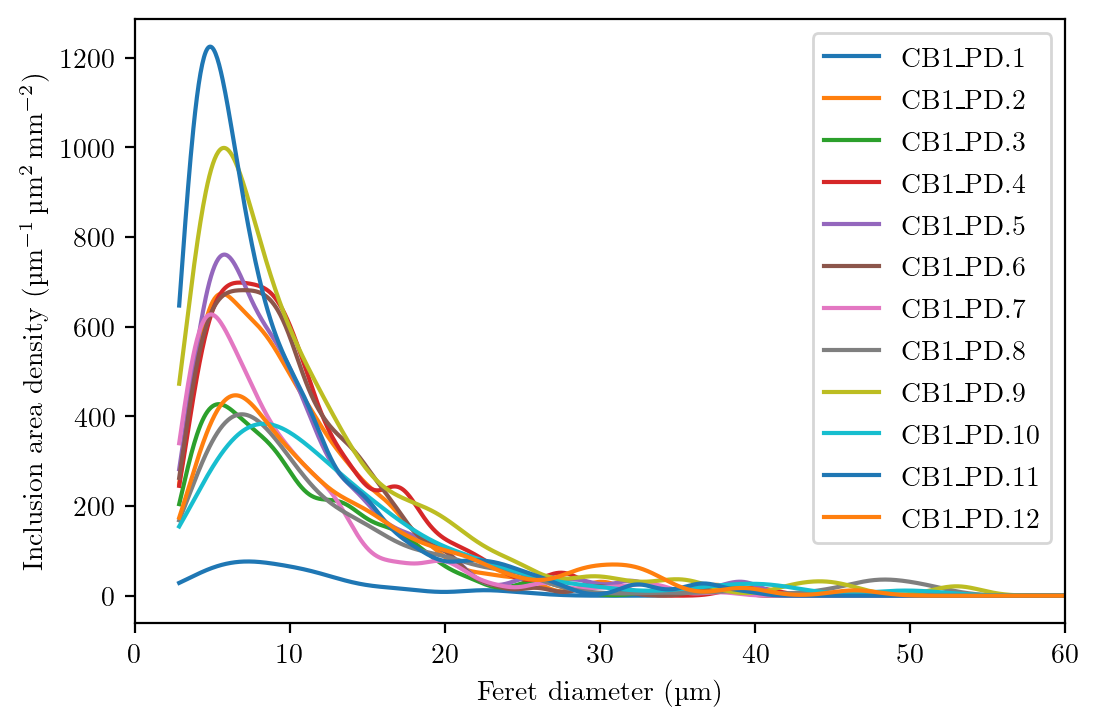

In [5]:
horiz_feret = f_a('CB1_PD', 'feret')
horiz_feret.savefig('horiz_feret.pdf', bbox_inches='tight', format='pdf')
horiz_feret = f_a('CB1_PD', 'sqr_area')
horiz_feret.savefig('horiz_sqra.pdf', bbox_inches='tight', format='pdf')
horiz_feret = f_a('CB2_BD', 'feret')
horiz_feret.savefig('vert_feret.pdf', bbox_inches='tight', format='pdf')
horiz_feret = f_a('CB2_BD', 'sqr_area')
horiz_feret.savefig('vert_sqra.pdf', bbox_inches='tight', format='pdf')

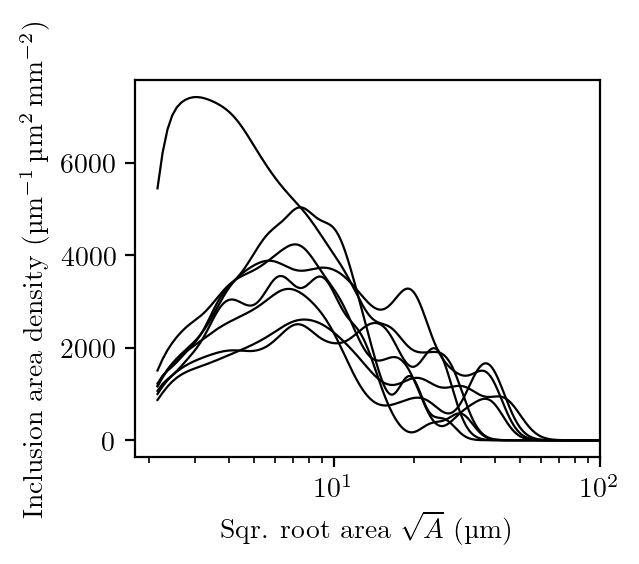

In [83]:
horiz_feret.gca()

In [84]:
meta, data = get_data()

<ipython-input-96-e81d77096d2f>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


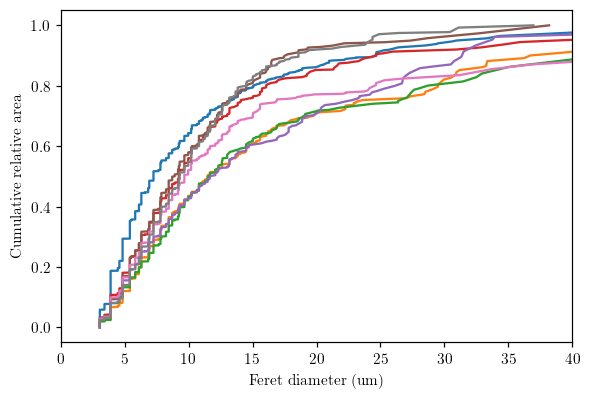

In [96]:
data = data.loc[data.incl_type.apply(lambda x: x not in ['4', '5', '6', '7'])]
data = data.sort_values(['ID_specimen', 'slice', 'feret'])
data['sumA'] = data.groupby(['ID_specimen', 'slice'])['area'].cumsum()
df = data.loc[data.ID_specimen=='CB2_BD']
fig = plt.figure(dpi=110)
ax = fig.gca()
for slice in df.slice.unique():
    df2 = df.loc[df.slice==slice]
    ax.plot(df2.feret, df2.sumA/df2.sumA.max())

ax.set_xlabel('Feret diameter (um)')
ax.set_ylabel('Cumulative relative area')
ax.set_xlim([0, 40])
fig.show()

C:\Users\Utilisateur\Documents\Python Scripts\incl_AMPO\inclusions\analysis.py:907: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fig = plt.figure(dpi=200)


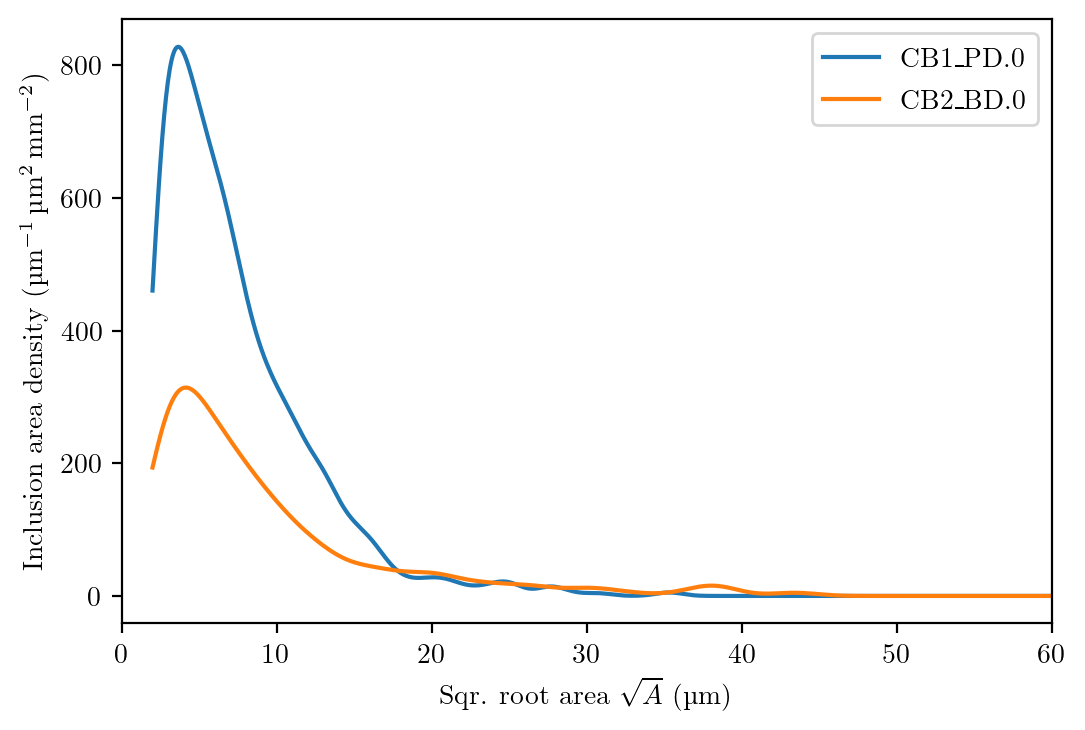

In [113]:
fig, x, Y = dens_vs_size(samples = ['CB1_PD', 'CB2_BD'], xlim = [0, 60], param = 'sqr_area', 
                  weighted=True, log=False, agg=True)

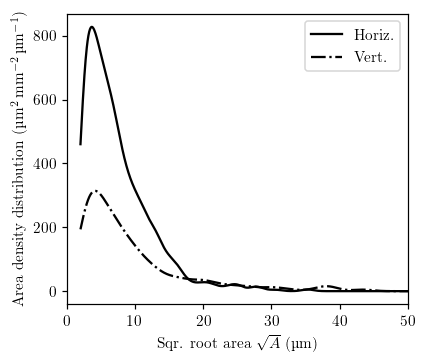

In [130]:
fig1= plt.figure(figsize=(4, 3.25), dpi=110)
ax = fig1.gca()
ax.plot(x, Y[0], 'k-', label='Horiz.')
ax.plot(x, Y[1], 'k-.', label = 'Vert.')
ax.set_xlim([0, 50])
ax.set_xlabel(r'Sqr. root area $\sqrt{A}$ (\si{\micro\metre})')
ax.set_ylabel(r'Area density distribution (\si{\micro\metre\squared\per\milli\metre\squared\per\micro\metre})')
ax.legend()

(0.0, 20.0)

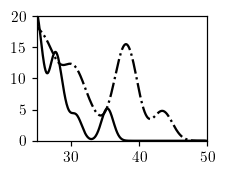

In [131]:
fig1a= plt.figure(figsize=(2, 1.5), dpi=110)
ax = fig1a.gca()
ax.plot(x, Y[0], 'k-', label='Horiz.')
ax.plot(x, Y[1], 'k-.', label = 'Vert.')
ax.set_xlim([25, 50])
ax.set_ylim([0, 20])

In [132]:
fig1.savefig('dist.pdf', bbox_to_inches='tight', format='pdf')
fig1a.savefig('dist_insert.pdf', bbox_to_inches='tight', format='pdf')

EDS spectra

In [133]:
ls

 Le volume dans le lecteur C nâ€™a pas de nom.
 Le numÃ©ro de sÃ©rie du volume est 0EF4-8DF7

 RÃ©pertoire de C:\Users\Utilisateur\Documents\Python Scripts\incl_AMPO\inclusions

2021-12-05  15:38    <DIR>          .
2021-12-05  15:38    <DIR>          ..
2021-12-04  13:41                94 .gitignore
2021-12-04  20:36    <DIR>          .ipynb_checkpoints
2021-12-05  14:57            47Â 068 analysis.py
2021-12-04  13:41            41Â 343 classify.png
2021-12-04  13:41            26Â 447 console.png
2021-12-04  13:44    <DIR>          data
2021-06-23  16:59       389Â 413Â 184 db_incl.h5
2021-12-04  13:41           229Â 618 dims.png
2021-12-05  15:37           306Â 201 dist.pdf
2021-12-05  15:37            37Â 676 dist_insert.pdf
2021-12-04  13:41            75Â 379 exclude.png
2021-12-04  13:41             1Â 876 extract_images.py
2021-12-05  15:38           459Â 987 figs_article.ipynb
2021-12-04  13:41            47Â 688 figtest.png
2021-12-04  13:41            11Â 592 gitwindow.png
